In [147]:
import numpy as np
from sklearn import *

In [148]:
X = np.array([67, 79, 71, 68, 67, 60])
y = np.array([0,0,0,1,1,1])

In [149]:
mask_1 = np.where(y == 1)
mask_0 = np.where(y == 0)


In [150]:
X_1 = X[mask_1]
X_0 = X[mask_0]

In [151]:
print(X_1)

[68 67 60]


In [152]:
mu_1 = np.mean(X_1)
mu_0 = np.mean(X_0)
print(mu_0, mu_1)

72.33333333333333 65.0


In [153]:
sig_1 = np.std(X_1)
sig_0 = np.std(X_0)
print(sig_0, sig_1)

4.988876515698588 3.559026084010437


In [154]:
class Gaussian:
    def __init__(self, mu, sig, dim):
        self.dim = dim
        self.mu = mu
        self.sig = sig
    def density(self, x):
        if(self.dim != 1):
            norm_const = 1/( ( (2*np.pi)**(self.dim/2)) * (np.linalg.det(self.sig)**0.5) )
            exp_val = np.exp( -0.5 * (x - self.mu).T @ np.linalg.inv(self.sig)  @ (x - self.mu))
        else:
            norm_const = 1/(self.sig * np.sqrt(2 * np.pi) )
            exp_val = np.exp(-0.5 * (   (   (x - self.mu)/self.sig) **2)    )
        return norm_const* exp_val


In [155]:
g_0  = Gaussian(mu_0, sig_0, 1) 
g_1 = Gaussian(mu_1, sig_1, dim = 1)
prob = g_0.density(72)/(g_0.density(72) + g_1.density(72))
print("p(y = m|x) = ", prob)

p(y = m|x) =  0.8312138511866822


In [156]:
## murphy - 4.21
sigma_1 = 1
sigma_2 = 1
mean_1 = 0
mean_2 = 1

def solve_quad(a , b, c):
    det = b**2 - 4*a*c
    if( a == 0):
        return -c/b
    const = 1/(2*a)
    return (-b + np.sqrt(det))*const , (-b - np.sqrt(det))*const

a_1 = sigma_1**2 - sigma_2**2
b = 2*mean_1*sigma_1**2 - 2*mean_2*sigma_2**2
c = (sigma_1*mean_2)**2  - (sigma_2*mean_1)**2  - 2*(sigma_1 *sigma_2)**2 * np.log(sigma_1 /sigma_2)

solve_quad(a_1, b, c)

0.5

[[0.00039894]
 [0.00039894]
 [0.00039894]
 ...
 [0.00039894]
 [0.00039894]
 [0.00039894]]
[-3.71688717 -3.71678717 -3.71668717 ...  3.71668717  3.71678717
  3.71688717]
[[6.07588285e-09]
 [6.07952948e-09]
 [6.08317824e-09]
 ...
 [1.33937331e-04]
 [1.33883768e-04]
 [1.33830226e-04]]
[-5.       -4.9999   -4.9998   ...  0.499755  0.499855  0.499955]


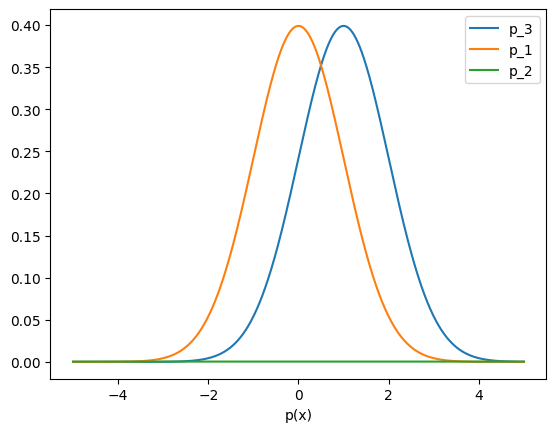

In [157]:
x = np.linspace(-5, 5, 100000)
x = x.reshape(x.shape[0], 1)
gaussian_1 = Gaussian(0, 1, 1)
gaussian_2 = Gaussian(1, 1e3, 1)
p_1x = np.apply_along_axis(gaussian_1.density, 1, x)
p_2x = np.apply_along_axis(gaussian_2.density, 1, x)
import matplotlib.pyplot as plt
region_1 = x[np.where(p_1x > p_2x)]
print(p_2x)
print(region_1)
gaussian_1 = Gaussian(0, 1, 1)
gaussian_3 = Gaussian(1, 1, 1)
p_1x = np.apply_along_axis(gaussian_1.density, 1, x)
p_3x = np.apply_along_axis(gaussian_3.density, 1, x)
plt.plot(x, p_3x, label = 'p_3')
plt.plot(x, p_1x, label ='p_1')
plt.plot(x, p_2x, label = 'p_2')
plt.xlabel('x')
plt.xlabel('p(x)')
region_2 = x[np.where(p_1x > p_3x)]
print(p_3x)
print(region_2)
plt.legend()
plt.savefig('../../Assignments/Assignment-3/Murphy-4.21.jpg')
plt.show()